## 1101~1108 요약

0.

데이터 로드, 문자열 없애고(전처리) tensor화 하는 것까지는 구현. 한 프레임당 총 414개고 항목별 개수가 동일하게 규칙적으로 들어가 있으니, 원본 형태대로만 출력된다면 후처리는 어렵지 않을 듯


1.

우선 string으로 돌려보려고 했는데 string은 tensor화가 안됨

2.

1107: string 취급 + text2sequence 적용해서 보통 NMT 돌리듯이 돌렸는데 성과가 안나옴 - keypoint는 맥락이 없으니 당연한 결과 같음

3.

1108: keypoint가 좌표값인 만큼 각각의 값을 float로 넣어서 돌리는 게 정확하겠다고 생각하여 output data 형태를 float 3D array로 바꿈. 차원 맞추는 걸 잘 못해서 3D array로 저장한 걸 2D로 reshape, 학습 후 다시 3D로 reshape 하는 방식을 이용. 그리고 OOM...

2d input -> 3d output lstm 으로 차원 잘 맞춰줄 수 있는 사람 혹은 다른 아이디어 있는 사람은 제발 help..



1. 파일 로드 & 전처리

In [ ]:
cd drive/My Drive/NMT1

/content/drive/My Drive/NMT1


In [ ]:
cd 형태소Json

/content/drive/My Drive/NMT1/형태소Json


In [ ]:
import numpy as np
import pandas as pd
import json
import re

# json에서 형태소에 해당하는 부분만 남김
def preprocess_gloss(f):
  f = str(f)
  #print(f)
  f = re.sub(r'[^\w]','',f)
  f = re.sub(r'name',' ',f)
  f = re.sub(r'[a-zA-Z0-9_]','',f)
  f = re.sub(r'  ','',f)
  return f

# 테스트
with open("NIA_SL_SEN0060_REAL10_R_morpheme.json", "r", encoding="utf-8", errors='ignore') as f:
      f = json.load(f) 
      f = preprocess_gloss(f)

tmp_gloss = []
tmp_gloss.append(f)
tmp_gloss

['쿠폰 샀다']

In [ ]:
# 형태소 json 데이터를 불러와서 str 형태로 data list에 넣기

gl = ["D"] #,"F","L","R","U"
gloss = []

for i in range(1,60): 
  i = str(i)
  for g in gl:
    with open("NIA_SL_SEN00" + i.zfill(2) + "_REAL06_"+ g + "_morpheme.json", "r", encoding="utf-8", errors='ignore') as f:
      f = json.load(f) 
      gloss.append(preprocess_gloss(f))

    with open("NIA_SL_SEN00" + i.zfill(2) + "_REAL10_"+ g + "_morpheme.json", "r", encoding="utf-8", errors='ignore') as f:
      f = json.load(f) 
      gloss.append(preprocess_gloss(f))


In [ ]:
# data list 확인
gloss

['왼쪽',
 '왼쪽',
 '왼쪽',
 '왼쪽',
 '오른쪽',
 '오른쪽',
 '오른쪽',
 '오른쪽',
 '여기',
 '여기',
 '여기',
 '여기',
 '저기',
 '저기',
 '저기',
 '저기',
 '운전 느리다',
 '운전 느리다',
 '운전 느리다',
 '운전 느리다',
 '운전 빨리',
 '운전 빨리',
 '자동차 빨리',
 '자동차 빨리',
 '시간 급하다',
 '시간 급하다',
 '시간 급하다',
 '시간 급하다',
 '급하다',
 '급하다',
 '급하다',
 '급하다',
 '약속 늦다',
 '약속 늦다',
 '약속 늦다',
 '약속 늦다',
 '저',
 '저',
 '저',
 '저',
 '당신',
 '당신',
 '당신',
 '당신',
 '이거 사람',
 '이거 사람',
 '이거 사람',
 '이거 사람',
 '말 잘못',
 '말 잘못',
 '말 잘못',
 '말 잘못',
 '걱정',
 '걱정',
 '걱정',
 '걱정',
 '항상',
 '항상',
 '항상',
 '항상',
 '원래',
 '원래',
 '원래',
 '원래',
 '천',
 '천',
 '천',
 '천',
 '만원',
 '만원',
 '만원',
 '만원',
 '택시 기본 천원',
 '택시 기본 천원',
 '택시 기본 요금 얼마',
 '택시 기본 요금 얼마',
 '택시 기본 만원',
 '택시 기본 만원',
 '택시 기본 만원',
 '택시 기본 만원',
 '얼마 맞다 확인',
 '금액 얼마 맞다 확인',
 '얼마 맞다 확인',
 '금액 얼마 맞다 확인',
 '밤 시 이후 돈 추가',
 '밤 시 이후 돈 추가',
 '밤이후 돈 추가',
 '밤이후 돈 추가',
 '고속도로 요금내다',
 '고속도로 요금내다',
 '고속도로 요금내다',
 '고속도로 요금내다',
 '택시 현금 되다',
 '택시 현금 되다',
 '택시 현금 되다',
 '택시 현금 되다',
 '장애인 카드',
 '장애인 카드',
 '장애인 카드',
 '장애인 카드',
 '아동 교통 카드',
 '아동 교통 카드',
 '아동 교통 카드 되다'

In [ ]:
gloss_=[]
for i in range(15):
  gloss_.append(gloss[i*4])

In [ ]:
gloss_

['왼쪽',
 '오른쪽',
 '여기',
 '저기',
 '운전 느리다',
 '운전 빨리',
 '시간 급하다',
 '급하다',
 '약속 늦다',
 '저',
 '당신',
 '이거 사람',
 '말 잘못',
 '걱정',
 '항상']

In [ ]:
# keypoint data도 동일하게 진행

In [ ]:
cd ..

/content/drive/My Drive/NMT1


In [ ]:
cd 키포인트Json

/content/drive/My Drive/NMT1/키포인트Json


In [ ]:
# 영상 데이터는 여러 개이다보니 list 혹은 array 형태로 들어갈 수 밖에 없는데 그러면 학습이 안됨
# 따라서 일단 { } [ ] 을 각각 $ % ^ & 으로 replace 하여 train, predict를 진행하고 
# 후에 predict한 데이터를 다시 replace 하는 방법을 사용하기로 함

import os

# json에서 형태소에 해당하는 부분만 남김 {} [] => $ % ^ & => {} []
def preprocess_keypoints(f):
  f = str(f)
  #print(k)
  f = re.sub(r'{','',f)
  f = re.sub(r'}','',f)
  f = re.sub(r'\[','',f)
  f = re.sub(r']','',f)

  f = re.sub(r'$\'version\': 1.3, \'people\': ^$\'person_id\': ^-1&, \'pose_keypoints_2d\': ^', '',f)
  f = re.sub(r'\'face_keypoints_2d\': ^', '\t', f)
  f = re.sub(r'\'hand_left_keypoints_2d\': ^', '\t', f)
  f = re.sub(r'\'hand_right_keypoints_2d\': ^', '\t', f)
  f = re.sub(r'\'pose_keypoints_3d\': ^&, \'face_keypoints_3d\': ^&, \'hand_left_keypoints_3d\': ^&, \'hand_right_keypoints_3d\': ^&%&%\"', '',f)

  f = re.sub(r'\'version\': 1.3, \'people\': \'person_id\': -1, \'pose_keypoints_2d\': ', '',f)
  f = re.sub(r'\'face_keypoints_2d\': ', '\t', f)
  f = re.sub(r'\'hand_left_keypoints_2d\': ', '\t', f)
  f = re.sub(r'\'hand_right_keypoints_2d\': ', '\t', f)
  f = re.sub(r'\'pose_keypoints_3d\': , \'face_keypoints_3d\': , \'hand_left_keypoints_3d\': , \'hand_right_keypoints_3d\': ', '',f)
  
  return f

In [ ]:
# 테스트

tmp_sign = []

for i in range (165):
  i = str(i)
  path2 = "NIA_SL_SEN0001_REAL06_D.mp4/NIA_SL_SEN0001_REAL06_D_000000000"+ i.zfill(3) +"_keypoints.json"
  with open(path2, "r", encoding="utf-8", errors='ignore') as f:
      f = json.load(f) 
      f = preprocess_keypoints(f)
      tmp_sign.append(f)

tmp_sign

# '왼쪽' 의 수어 영상 키포인트 시퀀스 (이게 하나의 영상 데이터임)

['998.832, 157.51, 0.854945, 989.572, 421.165, 0.749706, 801.079, 433.757, 0.603954, 735.22, 684.835, 0.754338, 694.445, 907.789, 0.7251, 1187.25, 411.837, 0.673643, 1262.64, 666.131, 0.72062, 1265.67, 907.851, 0.763629, 976.935, 1045.96, 0.305161, 845.089, 1039.71, 0.228664, 0, 0, 0, 0, 0, 0, 1099.35, 1077.35, 0.229298, 0, 0, 0, 0, 0, 0, 961.261, 135.65, 0.940718, 1036.56, 135.598, 0.909329, 892.241, 213.997, 0.909052, 1089.88, 210.912, 0.898652, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, \t898.986, 181.253, 0.453133, 900.026, 198.944, 0.544969, 903.148, 217.675, 0.534232, 909.392, 235.366, 0.643137, 923.961, 248.894, 0.690462, 941.652, 257.219, 0.669819, 963.505, 259.3, 0.680322, 982.237, 263.463, 0.701007, 1006.17, 265.544, 0.699582, 1022.82, 264.503, 0.679377, 1040.51, 259.3, 0.535766, 1056.12, 255.138, 0.44667, 1066.53, 249.935, 0.448658, 1073.81, 239.528, 0.486885, 1081.1, 226, 0.513223, 1082.14, 208.309, 0.601592, 1081.1, 184.375, 0.644473, 931.245, 125.059, 0.796466,

### 이건 영상데이터 넣은 것! 실제로 해볼 땐 이 코드 사용 (근데 어휘- 수어 쌍 맞추는 건 제대로 확인 안하고 임의로 한 거라 수정해야됨)

In [ ]:
sign_ = []

for j in range(15):
  j_=str(j+1)
  sign = []
  for i in range (130):
    i = str(i)
    path2 = "NIA_SL_SEN00"+j_.zfill(2)+"_REAL06_F.mp4/NIA_SL_SEN00"+j_.zfill(2)+"_REAL06_F_000000000"+ i.zfill(3) +"_keypoints.json"
    with open(path2, "r", encoding="utf-8", errors='ignore') as f:
        f = json.load(f) 
        f = preprocess_keypoints(f)
        sign.append(f)
  sign_.insert(j, sign)

sign_

[['1017.58, 279.861, 0.881513, 1011.46, 505.908, 0.759915, 832.51, 512.145, 0.662, 788.625, 766.621, 0.845103, 769.73, 1014.58, 0.770665, 1190.38, 493.379, 0.679393, 1246.91, 760.314, 0.764742, 1243.84, 1002.08, 0.782171, 1008.24, 1027.15, 0.35252, 895.315, 1020.89, 0.343087, 0, 0, 0, 0, 0, 0, 1118.18, 1036.54, 0.310361, 0, 0, 0, 0, 0, 0, 973.84, 245.425, 0.845714, 1045.96, 242.201, 0.889852, 914.161, 286.148, 0.928568, 1093.22, 276.762, 0.86565, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, \t919.097, 264.171, 0.827602, 922.819, 286.507, 0.8884, 924.681, 308.843, 0.859236, 931.195, 331.178, 0.87467, 943.294, 349.791, 0.790611, 959.115, 367.474, 0.806485, 975.867, 376.78, 0.875703, 998.202, 384.225, 0.869318, 1020.54, 384.225, 0.855472, 1042.87, 381.433, 0.853263, 1062.42, 369.335, 0.809211, 1077.31, 354.445, 0.826518, 1086.61, 335.832, 0.834906, 1090.34, 315.357, 0.805244, 1093.13, 293.952, 0.880144, 1093.13, 272.547, 0.914794, 1092.2, 251.142, 0.806299, 946.086, 231.599, 0.78

In [ ]:
sign_[0]

['1017.58, 279.861, 0.881513, 1011.46, 505.908, 0.759915, 832.51, 512.145, 0.662, 788.625, 766.621, 0.845103, 769.73, 1014.58, 0.770665, 1190.38, 493.379, 0.679393, 1246.91, 760.314, 0.764742, 1243.84, 1002.08, 0.782171, 1008.24, 1027.15, 0.35252, 895.315, 1020.89, 0.343087, 0, 0, 0, 0, 0, 0, 1118.18, 1036.54, 0.310361, 0, 0, 0, 0, 0, 0, 973.84, 245.425, 0.845714, 1045.96, 242.201, 0.889852, 914.161, 286.148, 0.928568, 1093.22, 276.762, 0.86565, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, \t919.097, 264.171, 0.827602, 922.819, 286.507, 0.8884, 924.681, 308.843, 0.859236, 931.195, 331.178, 0.87467, 943.294, 349.791, 0.790611, 959.115, 367.474, 0.806485, 975.867, 376.78, 0.875703, 998.202, 384.225, 0.869318, 1020.54, 384.225, 0.855472, 1042.87, 381.433, 0.853263, 1062.42, 369.335, 0.809211, 1077.31, 354.445, 0.826518, 1086.61, 335.832, 0.834906, 1090.34, 315.357, 0.805244, 1093.13, 293.952, 0.880144, 1093.13, 272.547, 0.914794, 1092.2, 251.142, 0.806299, 946.086, 231.599, 0.782

In [ ]:
X = pd.DataFrame(gloss_)
X

0
0       왼쪽
1      오른쪽
2       여기
3       저기
4   운전 느리다
5    운전 빨리
6   시간 급하다
7      급하다
8    약속 늦다
9        저
10      당신
11   이거 사람
12    말 잘못
13      걱정
14      항상

In [ ]:
y = pd.DataFrame(sign_)
y

0    ...                                                129
0   1017.58, 279.861, 0.881513, 1011.46, 505.908, ...  ...  1014.61, 264.24, 0.943493, 1014.47, 502.813, 0...
1   1008.25, 273.59, 0.828212, 1002.01, 502.875, 0...  ...  998.938, 261.169, 0.885111, 1002.02, 496.595, ...
2   1011.5, 276.806, 0.848957, 1014.45, 509.132, 0...  ...  1005.21, 283.026, 0.843566, 1008.25, 509.142, ...
3   992.557, 276.821, 0.882284, 992.717, 509.049, ...  ...  989.429, 264.217, 0.94443, 992.616, 509.128, 0...
4   992.628, 283.032, 0.899552, 992.767, 509.069, ...  ...  1005.22, 270.575, 0.825457, 1005.15, 509.014, ...
5   1002.01, 270.546, 0.824516, 998.867, 505.909, ...  ...  1027.18, 308.198, 0.850928, 995.807, 493.372, ...
6   1039.8, 279.962, 0.889832, 1039.75, 509.019, 0...  ...  1033.36, 283.021, 0.84402, 1036.56, 509.066, 0...
7   1033.38, 276.722, 0.826878, 1036.56, 505.982, ...  ...  1014.5, 264.34, 0.925141, 1014.61, 509.155, 0....
8   1024.05, 264.319, 0.87579, 1030.23, 502.872, 0...  ...  1017.74, 264.179, 0.930209, 1017.71, 499.642, ...
9   1036.6, 273.587, 0.852283, 1036.57, 509.164, 0...  ...  1039.64, 295.683, 0.875232, 1014.63, 502.791, ...
10  1039.83, 261.137, 0.936727, 1039.82, 493.522, ...  ...  1042.84, 261.205, 0.931117, 1039.66, 505.939, ...
11  1039.73, 264.287, 0.937459, 1039.78, 499.732, ...  ...  1017.58, 283.12, 0.910656, 1039.57, 502.813, 0...
12  1042.81, 289.207, 0.925793, 1039.7, 512.285, 0...  ...  1042.7, 264.252, 0.942252, 1039.7, 509.13, 0.8...
13  1036.45, 267.386, 0.857727, 1024.03, 505.985, ...  ...  1039.74, 264.101, 0.948506, 1036.49, 502.84, 0...
14  1027.14, 276.724, 0.822172, 1024.06, 512.168, ...  ...  1030.26, 264.355, 0.870035, 1027.1, 506.02, 0....

[15 rows x 130 columns]

In [ ]:
X = X[0].values
X

array(['왼쪽', '오른쪽', '여기', '저기', '운전 느리다', '운전 빨리', '시간 급하다', '급하다',
       '약속 늦다', '저', '당신', '이거 사람', '말 잘못', '걱정', '항상'], dtype=object)

In [ ]:
y = y[0].values
y

array(['1017.58, 279.861, 0.881513, 1011.46, 505.908, 0.759915, 832.51, 512.145, 0.662, 788.625, 766.621, 0.845103, 769.73, 1014.58, 0.770665, 1190.38, 493.379, 0.679393, 1246.91, 760.314, 0.764742, 1243.84, 1002.08, 0.782171, 1008.24, 1027.15, 0.35252, 895.315, 1020.89, 0.343087, 0, 0, 0, 0, 0, 0, 1118.18, 1036.54, 0.310361, 0, 0, 0, 0, 0, 0, 973.84, 245.425, 0.845714, 1045.96, 242.201, 0.889852, 914.161, 286.148, 0.928568, 1093.22, 276.762, 0.86565, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, \t919.097, 264.171, 0.827602, 922.819, 286.507, 0.8884, 924.681, 308.843, 0.859236, 931.195, 331.178, 0.87467, 943.294, 349.791, 0.790611, 959.115, 367.474, 0.806485, 975.867, 376.78, 0.875703, 998.202, 384.225, 0.869318, 1020.54, 384.225, 0.855472, 1042.87, 381.433, 0.853263, 1062.42, 369.335, 0.809211, 1077.31, 354.445, 0.826518, 1086.61, 335.832, 0.834906, 1090.34, 315.357, 0.805244, 1093.13, 293.952, 0.880144, 1093.13, 272.547, 0.914794, 1092.2, 251.142, 0.806299, 946.086, 231.599,

2.토크나이징

 https://towardsdatascience.com/neural-machine-translation-nmt-with-attention-mechanism-5e59b57bd2ac

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
import string
from string import digits
import re
from sklearn.utils import shuffle
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import LSTM, Input, Dense,Embedding, Concatenate, TimeDistributed
from tensorflow.keras.models import Model,load_model, model_from_json
from tensorflow.keras.utils import plot_model
from tensorflow.keras.preprocessing.text import one_hot, Tokenizer
from tensorflow.keras.callbacks import EarlyStopping
import pickle as pkl
import numpy as np


In [ ]:
#removing inverted commas
X = [re.sub("'",'',i) for i in X]
y = [re.sub("'",'',i) for i in y]

def remove_punc(text_list):
  table = str.maketrans('', '', string.punctuation)
  removed_punc_text = []
  for sent in text_list:
    sentance = [w.translate(table) for w in sent.split(' ')]
    removed_punc_text.append(' '.join(sentance))
  return removed_punc_text

#X = remove_punc(X)
#y = remove_punc(y)

remove_digits = str.maketrans('', '', digits)
removed_digits_text = []
for sent in X:
  sentance = [w.translate(remove_digits) for w in sent.split(' ')]
  removed_digits_text.append(' '.join(sentance))

X = removed_digits_text

# removing the stating and ending whitespaces
X = [i.strip() for i in X]
y = [i.strip() for i in y]

In [ ]:
# Putting the start and end words 
y = ["start " + i + " end" for i in y]

# manipulated_marathi_text_
y[0], X[0]

('start 1017.58, 279.861, 0.881513, 1011.46, 505.908, 0.759915, 832.51, 512.145, 0.662, 788.625, 766.621, 0.845103, 769.73, 1014.58, 0.770665, 1190.38, 493.379, 0.679393, 1246.91, 760.314, 0.764742, 1243.84, 1002.08, 0.782171, 1008.24, 1027.15, 0.35252, 895.315, 1020.89, 0.343087, 0, 0, 0, 0, 0, 0, 1118.18, 1036.54, 0.310361, 0, 0, 0, 0, 0, 0, 973.84, 245.425, 0.845714, 1045.96, 242.201, 0.889852, 914.161, 286.148, 0.928568, 1093.22, 276.762, 0.86565, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, \t919.097, 264.171, 0.827602, 922.819, 286.507, 0.8884, 924.681, 308.843, 0.859236, 931.195, 331.178, 0.87467, 943.294, 349.791, 0.790611, 959.115, 367.474, 0.806485, 975.867, 376.78, 0.875703, 998.202, 384.225, 0.869318, 1020.54, 384.225, 0.855472, 1042.87, 381.433, 0.853263, 1062.42, 369.335, 0.809211, 1077.31, 354.445, 0.826518, 1086.61, 335.832, 0.834906, 1090.34, 315.357, 0.805244, 1093.13, 293.952, 0.880144, 1093.13, 272.547, 0.914794, 1092.2, 251.142, 0.806299, 946.086, 231.599,

In [ ]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2)

In [ ]:
X_test[2]

'시간 급하다'

In [ ]:
# X의 경우 띄어쓰기 기준으로 나누고
# y의 경우 프레임 기준으로 나눔
  
def Max_length(data):
  max_length_ = max([len(x.split(' ')) for x in data])
  return max_length_

#Training data
max_X = Max_length(X_train)
max_y=140

#Test data
max_X_test = Max_length(X_test)
max_y_test=140

max_X, max_X_test, max_y, max_y_test

(2, 2, 140, 140)

In [ ]:
Tok = Tokenizer()
Tok.fit_on_texts(X_train)
word2index = Tok.word_index
vocab_size_source = len(word2index) + 1

X_train = Tok.texts_to_sequences(X_train)
X_train = pad_sequences(X_train, maxlen=max_X, padding='post')
X_test = Tok.texts_to_sequences(X_test)
X_test = pad_sequences(X_test, maxlen=max_X, padding='post')

In [ ]:
len(word2index)

16

In [ ]:
Tok_y = Tokenizer()
Tok_y.fit_on_texts(y_train)
word2index_y = Tok_y.word_index
vocab_size_target = len(word2index_y) + 1

y_train = Tok_y.texts_to_sequences(y_train)
y_train = pad_sequences(y_train, maxlen=max_y, padding='post')
y_test = Tok_y.texts_to_sequences(y_test)
y_test = pad_sequences(y_test, maxlen=max_y, padding='post')

In [ ]:
len(word2index_y)

2686

In [ ]:
vocab_size_source, vocab_size_target

(17, 2687)

In [ ]:
X_train[0], y_train[0]

(array([2, 0], dtype=int32),
 array([1084,  396,   31,  397,    9,    1, 1085,  609,   46,  224,    4,
           1, 1086,  278,  610,   90,   21,    1, 1087,  279,  398,  120,
         149,    1, 1088,  213,   72,  480,    8,    1, 1089,  611,  329,
         399,   81,    1, 1090,  107,  259,  481,   32,    1, 1091,  330,
         612,  140,    7,    1, 1092,  255,  613,  108,    8,    1, 1093,
         331,  765,  109,   10,    1, 1094,  482,  766,  603,   17,    1,
        1095,   89,  767,  614,   79,    1, 1096,  400, 1097,  190,   58,
           1, 1098,  615,  768,  332,   24,    1, 1099,  110,  280,  226,
         111,    1, 1100,  616,   73,  140,    7,    1, 1101,  191,   53,
         281,   18,    1, 1102,  483, 1103,  164,   75,    1, 1104,  401,
         278,  484,   12,    1, 1105,  769,  227,  394,   24,    1, 1106,
         616,   73,  476,    5,    1, 1107,  250, 1108,  228,  125,    1,
        1109, 1110,  192,  282,   57,    1, 1111,  126], dtype=int32))


*1*) https://towardsdatascience.com/neural-machine-translation-nmt-with-attention-mechanism-5e59b57bd2ac 참고하여  수정 용이하게 class로 만듦

In [ ]:
import tensorflow as tf
import os
from tensorflow.python.keras.layers import Layer
from tensorflow.python.keras import backend as K

In [ ]:
class Encoder(tf.keras.Model):

  def __init__(self, max_X,latent_dim, vocab_size_source):
    super(Encoder, self).__init__()

    self.latent_dim=latent_dim 
    self.vocab_size_source=vocab_size_source
    self.encoder_inputs = tf.keras.layers.Input(shape=(max_X,)) 

    self.enc_emb = tf.keras.layers.Embedding(vocab_size_source, latent_dim, trainable=True)
    self.encoder_lstm1 = tf.keras.layers.LSTM(latent_dim,return_sequences=True,return_state=True) 
    self.encoder_lstm2 = tf.keras.layers.LSTM(latent_dim,return_sequences=True,return_state=True) 
    self.encoder_lstm3 = tf.keras.layers.LSTM(latent_dim,return_state=True, return_sequences=True) 

  def call(self, i, j, k):
    x = self.enc_emb(encoder_inputs)
    encoder_output1, state_h1, state_c1 = self.encoder_lstm1(x)
    encoder_output2, state_h2, state_c2 = self.encoder_lstm2(encoder_output1)
    encoder_outputs, state_h, state_c = self.encoder_lstm3(encoder_output2)

    return encoder_outputs, state_h, state_c
    #return {'encoder_outputs': encoder_outputs, 'state_h': state_h, 'state_c': state_c}


In [ ]:
class Decoder(tf.keras.Model):

  def __init__(self, latent_dim, vocab_size_target,state_h, state_c):
    super(Decoder, self).__init__()

    self.latent_dim=latent_dim 
    self.vocab_size_target=vocab_size_target
    self.decoder_inputs = tf.keras.layers.Input(shape=(None,)) 

    self.dec_emb = tf.keras.layers.Embedding(vocab_size_target, latent_dim, trainable=True)
    self.decoder_lstm = tf.keras.layers.LSTM(latent_dim, return_sequences=True, return_state=True) 

  def call(self, i, j, k):
    x = self.dec_emb(decoder_inputs)
    decoder_outputs,decoder_fwd_state, decoder_back_state = self.decoder_lstm(x,initial_state=[state_h, state_c])

    return decoder_outputs,decoder_fwd_state, decoder_back_state

In [ ]:
#https://github.com/thushv89/attention_keras/blob/master/src/layers/attention.py
class AttentionLayer(Layer):
    """
    This class implements Bahdanau attention (https://arxiv.org/pdf/1409.0473.pdf).
    There are three sets of weights introduced W_a, U_a, and V_a
     """

    def __init__(self, **kwargs):
        super(AttentionLayer, self).__init__(**kwargs)

    def build(self, input_shape):
        assert isinstance(input_shape, list)
        # Create a trainable weight variable for this layer.

        self.W_a = self.add_weight(name='W_a',
                                   shape=tf.TensorShape((input_shape[0][2], input_shape[0][2])),
                                   initializer='uniform',
                                   trainable=True)
        self.U_a = self.add_weight(name='U_a',
                                   shape=tf.TensorShape((input_shape[1][2], input_shape[0][2])),
                                   initializer='uniform',
                                   trainable=True)
        self.V_a = self.add_weight(name='V_a',
                                   shape=tf.TensorShape((input_shape[0][2], 1)),
                                   initializer='uniform',
                                   trainable=True)

        super(AttentionLayer, self).build(input_shape)  # Be sure to call this at the end

    def call(self, inputs, verbose=False):
        """
        inputs: [encoder_output_sequence, decoder_output_sequence]
        """
        assert type(inputs) == list
        encoder_out_seq, decoder_out_seq = inputs
        if verbose:
            print('encoder_out_seq>', encoder_out_seq.shape)
            print('decoder_out_seq>', decoder_out_seq.shape)

        def energy_step(inputs, states):
            """ Step function for computing energy for a single decoder state
            inputs: (batchsize * 1 * de_in_dim)
            states: (batchsize * 1 * de_latent_dim)
            """

            assert_msg = "States must be an iterable. Got {} of type {}".format(states, type(states))
            assert isinstance(states, list) or isinstance(states, tuple), assert_msg

            """ Some parameters required for shaping tensors"""
            en_seq_len, en_hidden = encoder_out_seq.shape[1], encoder_out_seq.shape[2]
            de_hidden = inputs.shape[-1]

            """ Computing S.Wa where S=[s0, s1, ..., si]"""
            # <= batch size * en_seq_len * latent_dim
            W_a_dot_s = K.dot(encoder_out_seq, self.W_a)

            """ Computing hj.Ua """
            U_a_dot_h = K.expand_dims(K.dot(inputs, self.U_a), 1)  # <= batch_size, 1, latent_dim
            if verbose:
                print('Ua.h>', U_a_dot_h.shape)

            """ tanh(S.Wa + hj.Ua) """
            # <= batch_size*en_seq_len, latent_dim
            Ws_plus_Uh = K.tanh(W_a_dot_s + U_a_dot_h)
            if verbose:
                print('Ws+Uh>', Ws_plus_Uh.shape)

            """ softmax(va.tanh(S.Wa + hj.Ua)) """
            # <= batch_size, en_seq_len
            e_i = K.squeeze(K.dot(Ws_plus_Uh, self.V_a), axis=-1)
            # <= batch_size, en_seq_len
            e_i = K.softmax(e_i)

            if verbose:
                print('ei>', e_i.shape)

            return e_i, [e_i]

        def context_step(inputs, states):
            """ Step function for computing ci using ei """

            assert_msg = "States must be an iterable. Got {} of type {}".format(states, type(states))
            assert isinstance(states, list) or isinstance(states, tuple), assert_msg

            # <= batch_size, hidden_size
            c_i = K.sum(encoder_out_seq * K.expand_dims(inputs, -1), axis=1)
            if verbose:
                print('ci>', c_i.shape)
            return c_i, [c_i]

        fake_state_c = K.sum(encoder_out_seq, axis=1)
        fake_state_e = K.sum(encoder_out_seq, axis=2)  # <= (batch_size, enc_seq_len, latent_dim

        """ Computing energy outputs """
        # e_outputs => (batch_size, de_seq_len, en_seq_len)
        last_out, e_outputs, _ = K.rnn(
            energy_step, decoder_out_seq, [fake_state_e],
        )

        """ Computing context vectors """
        last_out, c_outputs, _ = K.rnn(
            context_step, e_outputs, [fake_state_c],
        )

        return c_outputs, e_outputs

    def compute_output_shape(self, input_shape):
        """ Outputs produced by the layer """
        return [
            tf.TensorShape((input_shape[1][0], input_shape[1][1], input_shape[1][2])),
            tf.TensorShape((input_shape[1][0], input_shape[1][1], input_shape[0][1]))
        ]

In [ ]:
latent_dim = 50

encoder= Encoder(max_X, latent_dim, vocab_size_source)
encoder_outputs, state_h, state_c = encoder(0,0,0)

decoder = Decoder(latent_dim, vocab_size_target,state_h, state_c)
decoder_outputs,decoder_fwd_state, decoder_back_state = decoder(0,0,0)

#Attention Layer
attn_layer = AttentionLayer(name='attention_layer') 
attn_out, attn_states = attn_layer([encoder_outputs, decoder_outputs])

# Concat attention output and decoder LSTM output 
decoder_concat_input = Concatenate(axis=-1, name='concat_layer')([decoder_outputs, attn_out])

#Dense layer
decoder_dense = TimeDistributed(Dense(vocab_size_target, activation='softmax')) 
decoder_outputs = decoder_dense(decoder_concat_input)

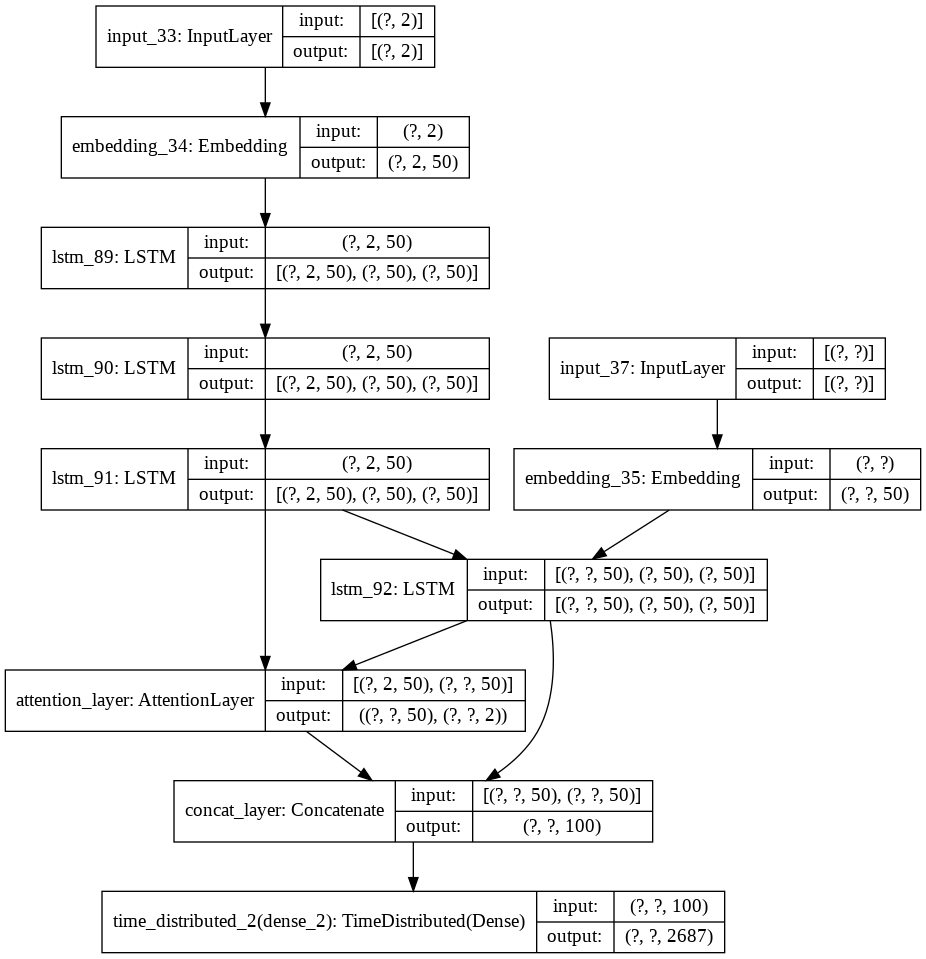

In [ ]:
model = Model([encoder_inputs, decoder_inputs], decoder_outputs)
plot_model(model, to_file='train_model.png', show_shapes=True)

In [ ]:
model.compile(optimizer='Adam',
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

In [ ]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1) # val_loss가 올라가면 멈춰주는 것

In [ ]:
history = model.fit([X_train, y_train[:,:-1]], y_train.reshape(y_train.shape[0], y_train.shape[1],1)[:,1:], 
                    epochs=50, 
                    #callbacks=[es],
                    batch_size=1,
                    validation_data = ([X_test, y_test[:,:-1]],           y_test.reshape(y_test.shape[0], y_test.shape[1], 1)[:,1:]))

Epoch 1/50
12/12 [==============================] - 3s 239ms/step - loss: 7.8900 - accuracy: 0.1265 - val_loss: 7.8716 - val_accuracy: 0.2158
Epoch 2/50
12/12 [==============================] - 2s 137ms/step - loss: 7.7957 - accuracy: 0.1661 - val_loss: 7.5490 - val_accuracy: 0.2158
Epoch 3/50
12/12 [==============================] - 2s 133ms/step - loss: 7.2219 - accuracy: 0.1661 - val_loss: 6.9014 - val_accuracy: 0.2158
Epoch 4/50
12/12 [==============================] - 2s 132ms/step - loss: 6.5720 - accuracy: 0.1661 - val_loss: 6.3857 - val_accuracy: 0.2158
Epoch 5/50
12/12 [==============================] - 2s 133ms/step - loss: 6.0710 - accuracy: 0.1661 - val_loss: 6.1179 - val_accuracy: 0.2158
Epoch 6/50
12/12 [==============================] - 2s 139ms/step - loss: 5.8938 - accuracy: 0.1661 - val_loss: 6.1692 - val_accuracy: 0.2158
Epoch 7/50
12/12 [==============================] - 2s 131ms/step - loss: 5.8400 - accuracy: 0.1661 - val_loss: 6.1749 - val_accuracy: 0.2158
Epoch 

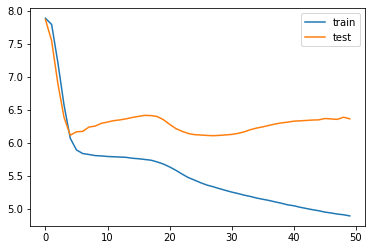

In [ ]:
from matplotlib import pyplot 
pyplot.plot(history.history['loss'], label='train') 
pyplot.plot(history.history['val_loss'], label='test') 
pyplot.legend() 
pyplot.show()

In [ ]:
model_json = model.to_json()
with open("NMT_model.json", "w") as json_file:
    json_file.write(model_json)
    
# serialize weights to HDF5
model.save_weights("NMT_model_weight.h5")
print("Saved model to disk")

Saved model to disk


In [ ]:
# loading the model architecture and asigning the weights
json_file = open('NMT_model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
model_loaded = model_from_json(loaded_model_json, custom_objects={'AttentionLayer': AttentionLayer})
# load weights into new model
model_loaded.load_weights("NMT_model_weight.h5")

In [ ]:
latent_dim=50
# encoder inference
encoder_inputs = model_loaded.input[0]  #loading encoder_inputs
encoder_outputs, state_h, state_c = model_loaded.layers[6].output #loading encoder_outputs
#print(encoder_outputs.shape)
encoder_model = Model(inputs=encoder_inputs,outputs=[encoder_outputs, state_h, state_c])
# decoder inference
# Below tensors will hold the states of the previous time step
decoder_state_input_h = Input(shape=(latent_dim,))
decoder_state_input_c = Input(shape=(latent_dim,))
decoder_hidden_state_input = Input(shape=(32,latent_dim))
# Get the embeddings of the decoder sequence
decoder_inputs = model_loaded.layers[3].output
#print(decoder_inputs.shape)
dec_emb_layer = model_loaded.layers[5]
dec_emb2= dec_emb_layer(decoder_inputs)
# To predict the next word in the sequence, set the initial states to the states from the previous time step
decoder_lstm = model_loaded.layers[7]
decoder_outputs2, state_h2, state_c2 = decoder_lstm(dec_emb2, initial_state=[decoder_state_input_h, decoder_state_input_c])
#attention inference
attn_layer = model_loaded.layers[8]
attn_out_inf, attn_states_inf = attn_layer([decoder_hidden_state_input, decoder_outputs2])
concate = model_loaded.layers[9]
decoder_inf_concat = concate([decoder_outputs2, attn_out_inf])
# A dense softmax layer to generate prob dist. over the target vocabulary
decoder_dense = model_loaded.layers[10]
decoder_outputs2 = decoder_dense(decoder_inf_concat)
# Final decoder model
decoder_model = Model(
[decoder_inputs] + [decoder_hidden_state_input,decoder_state_input_h, decoder_state_input_c],
[decoder_outputs2] + [state_h2, state_c2])

In [ ]:
def decode_sequence(input_seq):
    # Encode the input as state vectors.
    e_out, e_h, e_c = encoder_model.predict(input_seq)

    # Generate empty target sequence of length 1.
    target_seq = np.zeros((1,1))

    # Chose the 'start' word as the first word of the target sequence
    target_seq[0, 0] = word2index_y['start']
    stop_condition = False
    decoded_sentence = ''

    while not stop_condition:
        output_tokens, h, c = decoder_model.predict([target_seq] + [e_out, e_h, e_c])
        # Sample a token
        sampled_token_index = np.argmax(output_tokens[0, -1, :])

        if sampled_token_index == 0:
          break

        else:
          sampled_token = index2word_y[sampled_token_index]

          if (sampled_token!='end'):
            decoded_sentence += ' '+sampled_token
          # Exit condition: either hit max length or find stop word.
          
          if (sampled_token == 'end' or len(decoded_sentence.split()) >= (26-1)):
            stop_condition = True

          # Update the target sequence (of length 1).
          target_seq = np.zeros((1,1))
          target_seq[0,0] = sampled_token_index

          # Update internal states
          e_h, e_c = h, c
  
    return decoded_sentence

In [ ]:
index2word = Tok.index_word
index2word_y = Tok_y.index_word

In [ ]:
def seq2text_y(input_seq):
    newString=''
    for i in input_seq:
      if((i!=0 and i!= word2index_y['start']) and i!= word2index_y['end']):
        newString=newString+index2word_y[i]+' '
    return newString

def seq2text(input_seq):
    newString=''
    for i in input_seq:
      if(i!=0):
        newString=newString+index2word[i]+' '
    return newString

In [ ]:
for i in range(3):  
  print("Input:",seq2text(X_test[i]))
  print("Original:",seq2text_y(y_test[i]))
  print("Predicted:",decode_sequence(X_test[i].reshape(1,2)))
  print("\n")

Input: 
Original: 0 1229 85 1191 88 0 1275 94 1118 14 0 1265 7 1160 13 0 1255 46 1172 42 0 1242 14 1171 4 0 1287 21 1110 97 0 1277 99 1146 81 0 1269 8 1160 13 0 55 1166 27 0 799 1041 53 0 139 1062 26 0 852 951 1102 7 0 1142 11 0 855 1171 14 0 822 88 1124 48 0 825 991 1166 99 0 839 1188 77 0 845 1203 28 0 797 994 1130 7 0 807 327 1172 18 0 819 77 1190 84 0 825 991 1201 21 0 781 1126 55 0 789 699 1164 92 0 799 1180 47 0 812 1188 77 0 773 109 1122 41 0 775 182 1154 55 0 782 441 1164 92 0 791 773 4 0 
Predicted:  1244 1244 1157 1157 1157 0 1162 0 765796 1157 1157 0 5 0 5 0 5 0 5 0 5 0 5 0 5


Input: 
Original: 99 1188 82 0 9 1104 98 0 1273 92 1151 89 0 1262 94 1167 86 0 1251 96 1170 86 0 88 1099 99 0 1284 9 92 0 1277 91 1152 89 0 1269 93 1161 87 0 794 721 1031 41 0 824 742 1053 42 0 847 758 1095 45 0 848 758 1132 48 0 849 759 1158 5 0 814 735 1118 47 0 817 737 1164 5 0 1184 52 0 838 751 1198 53 0 791 719 1121 47 0 799 724 1166 5 0 813 734 1187 52 0 819 1199 53 0 776 708 1118 47 0 784 1159 

원래 세번째, '급하다'의 original output은 

1033.38, 276.722, 0.826878, 1036.56, 505.982, 0.771192, 860.713, 509.079, 0.664482, 813.572, 766.693, 0.804181, 794.894, 1017.76...


왜 original output도 변했는지, input 데이터 두개는 왜 사라진 건지 (vector로 띄워보면 [0,0]이라고 뜸), predicted output의 길이는 왜 저렇게 짧은지 더 수정해보겠습니다.